# <center>Digital Image Processing - Problem Set 2</center>

### Student Names:
* Karolay Ardila Salazar
* Julián Elías Sibaja García
* Andrés Simancas Mateus

### Instructions

This Problem Set covers the topics of Image enhancement in the spatial domain, power law transformations, histogram equalization, smoothing, median filters, image sharpening, Laplacian of an image, image gradients and Sobel operators. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Definitions

In [4]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import os
import cv2
import matplotlib.pyplot as mplt
import random


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = sorted(os.listdir(pth))
print files

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

['Woman.bmp', 'blurry_moon.png', 'cameraman.png', 'cameraman_new.png', 'ckt_board_saltpep_prob_pt05.png', 'contact_lens_original.png', 'darkPollen.jpg', 'face.png', 'hut.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'moon.jpg', 'new_cameraman.png', 'pollen.jpg', 'rose.bmp', 'runway.jpg', 'skull.bmp', 'spine.jpg', 'test_pattern_blurring_orig.png']


### Problem 1

Implement the code for the function below, which runs histogram equalization on a grayscale image. Your code should compute the histogram of the image, and use the cdf as a transformation function. The function should return the equalized image as an array. Use the function to do histogram equalization on the images <tt>darkPollen.jpg</tt>, <tt>lightPollen.jpg</tt>, <tt>lowContrastPollen.jpg</tt>, <tt>pollen.jpg</tt>, <tt>spine.jpg</tt> and <tt>runway.jpg</tt>. Include in the report plots and comparisons between the histograms of the corrected images to those of the originals. Also include a plot of the transformation function that equalizes the input histograms. Please comment your results.

Please comment results here.

#### Resultados
Para resolver este punto, se creó una función(histogramEq) que recibe una array(img), de la imagen que a la que se le quiere aplicar la ecualización de histograma, como parametro. A la imagen se le hallan los valores del histograma(hist), con esos valores se construye la cdf para los valores del histograma que no son cero. luego se obtienen los valores de intensidad de píxeles que se encuentran en la imagen (v), para establecer una correspondencia entre estos y la cdf, lo cual se guarda en un diccionario(cdf_v). Luego se aplica la siguiente función a cada valor de píxel en la imagen:

$$ h(x,y) = round\left(\frac{(cdf(v)-cdfmin) \cdot (L-1)}{N \cdot M - 1} \right) $$

Donde $h(x,y)$ es el nuevo valor del píxel, $cdf(v)$ es el valor de la cdf en la intensidad de píxel $v$ que nos regresa el diccionario cdf_v, $cdfmin$ es el valor mínimo de la cdf, $L$ es el valor máximo de intensidades de pixel y $N$ y $M$ son las dimensiones de la array. Despues de lo anterior se devuelve la imagen con la transformación realizada.

Se graficaron las imágenes antes de la transformación y despues, así como sus respectivos histogramas y la cdf.

Se puede ver que las imágenes redistribuyeron su histograma en los casos en los que había una preferencia hacia un lado del espectro, como es el caso de <tt>runway.jpg</tt> y <tt>lowContrastPollen.jpg</tt>, sus imágenes resultantes se persiven con mayores detalles luego de su transformación. En otros casos como en el de <tt>pollen.jpg</tt> en el que su histograma se encontraba bien distribuído, los cambios que realizó la transformación no contribuyerón a arreglar el aspecto de la imágen, ya que la función regresó una imágen similar a la de entrada. En el caso de <tt>spine.jpg</tt> en el que los valores de intensidad de pixel se encuentran casi en el limite inferior del espectro , solo movió los valores más al centro, pero incluso con este histograma la imágen transformada permite percibir mejor los detalles de la espina.


darkPollen.jpg


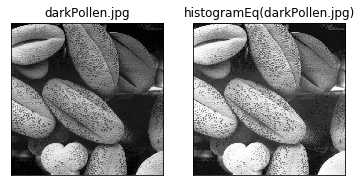

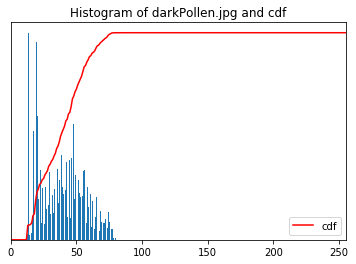

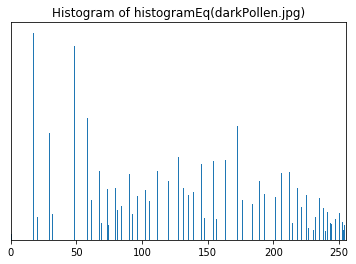

lightPollen.jpg


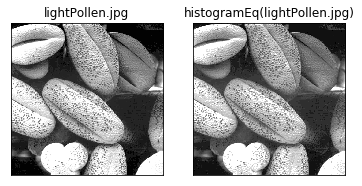

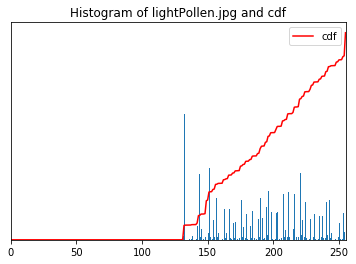

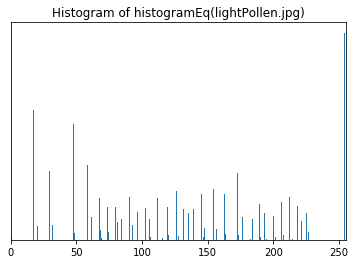

lowContrastPollen.jpg


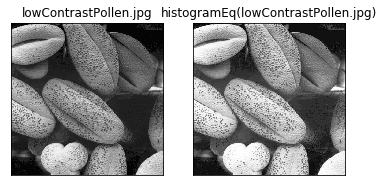

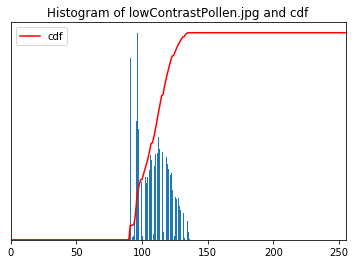

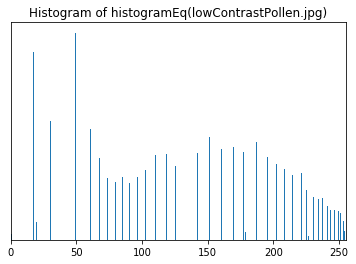

pollen.jpg


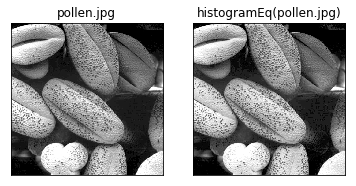

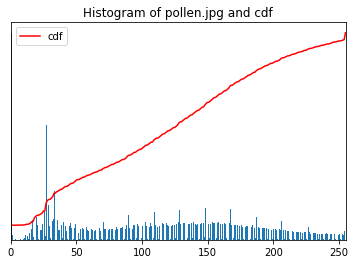

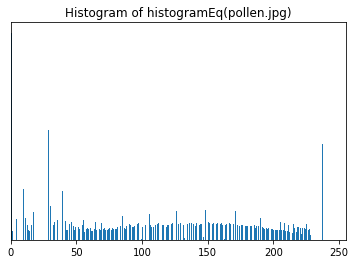

runway.jpg


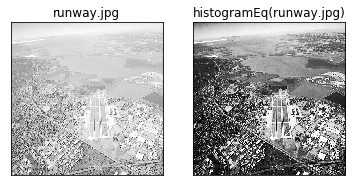

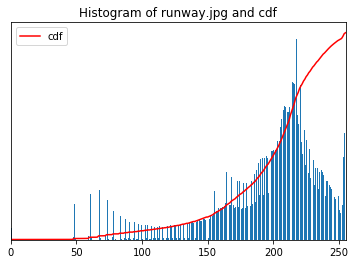

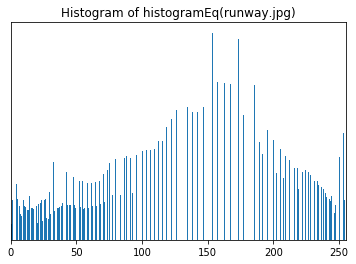

spine.jpg


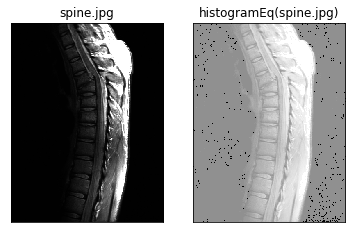

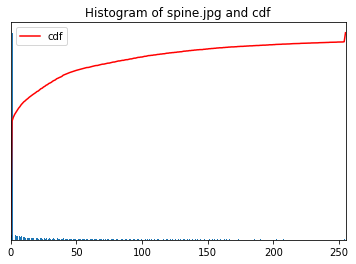

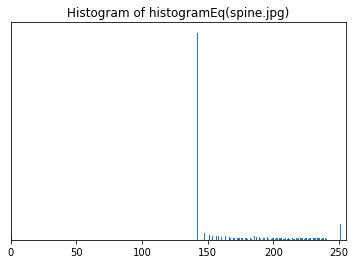

In [32]:
def histogramEq(img):
    """ Function that runs histogram equalization in an image array
            Input arguments
            img: image array
        Output
            img: The image array with histogram equalization      
    """
    
    hist,_ = np.histogram(img,256,[0,256])
    histl = list(hist.flatten())
    
    cdf = np.cumsum(filter(lambda a: a != 0, list(histl)))
    v = list(set(img.flatten()))
    v = sorted(v)
    cdf_v = {}
    for i in range(0,len(v)):
        cdf_v[v[i]] = cdf[i]
    N = img.shape[0]
    M = img.shape[1]
    cdf_min = min(cdf)
    img = np.array(img)
    for i in range(0,N):
        for j in range(0,M):
            img[i][j]= round(((cdf_v.get(img[i][j])-cdf_min)*(255))/(M*N-1))
    return img
            
    
for i in [6,9,10,13,15,17]:
    print(files[i])
    img = rg(files[i])
    imgh = histogramEq(rg(files[i]))
    mplt.figure()
    mplt.subplot(121)
    mplt.imshow(rg(files[i]), cmap='gray'),mplt.title(files[i]),mplt.yticks([]),mplt.xticks([])
    mplt.subplot(122)
    mplt.imshow(imgh, cmap='gray'),mplt.title("histogramEq("+files[i]+")"),mplt.yticks([]),mplt.xticks([])
    mplt.show(block = False)
    mplt.figure()
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    cdf = hist.cumsum()
    cdf_n = cdf*hist.max()/ cdf.max()
    mplt.bar(center, hist, align='center', width=width),mplt.title("Histogram of "+files[i]+" and cdf"),mplt.yticks([])
    p_cdf_n, = mplt.plot(cdf_n,color = 'r')
    mplt.legend([p_cdf_n], ['cdf'])
    mplt.xlim( (0, 255) )
    mplt.show(block = False)
    mplt.figure()
    hist, bins = np.histogram(imgh.flatten(),256,[0,256])
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    mplt.bar(center, hist, align='center', width=width),mplt.title("Histogram of histogramEq("+files[i]+")"),mplt.yticks([])
    mplt.xlim( (0, 255) )
    mplt.show(block = False)    

#### Problem 2

Implement the code for the function below which performs a power law transformation on an image. This function should take an image array and the gamma value to be used in the transformation as its only input parameters. The function should return a new image array which is the power transformation of the original image. Power law transformations are achieved using the following formula:
$$ g(x,y) = T[f(x,y)] = c \cdot f(x,y) ^ \gamma $$

where $g(x,y)$ is the output pixel value, $f(x,y)$ is the original pixel value, $\gamma$ is the parameter controlling the power law transformation and $c$ is a constant usually set to 1. Note that you convert the image so that the intensity values are in the range 0.0 – 1.0, rather than in 0 – 255.

Try this new function out on the images <tt>spine.jpg</tt> and <tt>runway.jpg</tt>, experimenting with different values for $\gamma$. Please comment your results.

(Discuss your results after looking at the resulting images)

In [8]:
image_1 = files(13)
image_2 = files(16)

gamma = [-100, -80, -60, -40, -20, 20, 40, 60, 80, 100]

def op(gamma, res, img):
    for i in range(0, abs(gamma - 1)):
        if gamma < 0:
            res = np.divide(res,img)
        elif gamma > 0:
            res = np.multiply(res, img)
        else:
            res = res
    return res

for k in gamma:
    print gamma[k]

TypeError: 'list' object is not callable

### Problem 3

Implement a function that performs smoothing on an input image with an averaging filter mask of size $n$. The function should take two inputs: an image matrix and the filter size $n$. Use the image <tt>test_pattern_blurring_orig.tif</tt> to test your algorithm. Use averaging filter masks of sizes $n = 3, 5, 9, 15, 35$. Analyze the results you obtained.

In [2]:
n = [3, 5, 9, 15, 35]
def smoo(mx, n):
    pass

### Problem 4

Consider the image <tt>ckt_board_saltpep_prob_pt05.png</tt>. It has been corrupted with ‘salt-and-pepper’ noise (more formally known as impulse noise). Try to remove the noise from this image by applying a median filter of size 3x3. Compare the result to applying an averaging filter of size 3x3.  Increase the kernel size to 3x3, 5x5, 9x9, 15x15 and repeat. Analyze the results you obtained. Did the filter successfully remove the noise? Did you observe any other side effects?

You can also corrupt any image you like with a salt-and-pepper noise generator. Write another function which adds salt-and-pepper noise to an input image. Use that function to corrupt additional images. Try to recover the original images using a median filter of appropriate size.

(Discuss your results after looking at the resulting images) Analyze the results you obtained. Did the filter successfully remove the noise? Did you observe any other side effects?

#### Resultados
AL comparar el filtro de media con el filtro de mediana con el kernel de tamaño 3, se puede observar que el filtro de mediana no puede eliminar el ruido completamente, mientras que el de medía lo elimina casi por completo. El problema con el de media es que se pierde nitidez cuando se aplica, el filtro de mediana permite ver mayores detalles despues de su aplicación.

Se utilizo la función cv2.medianBlur para aplicar el filtro de media para los tamaño 3, 5, 9, 15. Se puedo observar que a medida que fue aumentando el tamaño del kernel el ruido se reducía más. El filtro no pudo reducir completamente el ruido hasta que fue de tamaño 9 o mayor. A pesar de que entre mayor sea el tamaño del kernel mejor es la reducción del ruido, se pierden detalles en la imagen, lo cual se puede apreciar bien desde el filtro 9 en adelante.

Se creó una función(applySaPN) que añade ruido de impulso, con una probabilidad de 10% de que un píxel sea cambiado a 0 o de 10% de que sea cambiado a 255. Se le aplicó esta función a la imagen <tt>runway.jpg</tt> y el filtro pudo remover el ruido a partir de la aplicación del kernel de tamaño 9. Al igual que con la prueba anterior se pierden detalles a medida que aumenta el tamaño del kernel.

kernel size: 3x3


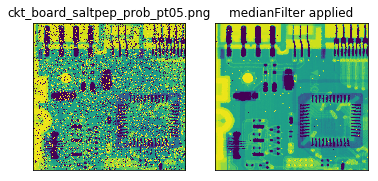

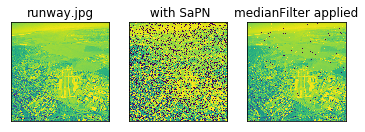

kernel size: 5x5


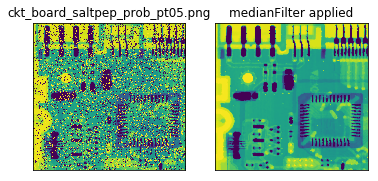

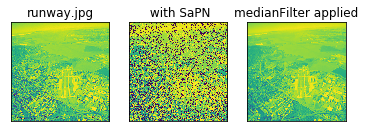

kernel size: 9x9


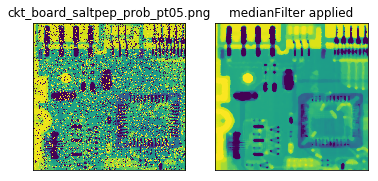

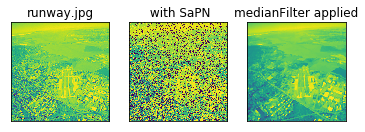

kernel size: 15x15


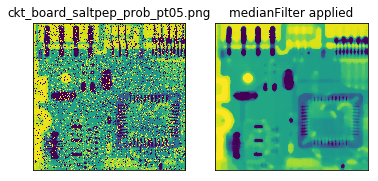

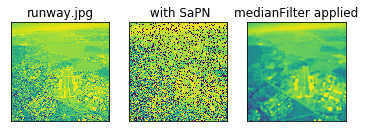

In [34]:
def applySaPN(img,p):
    """ Function that apply Salt and Pepper Noise to an array image
        Input arguments
            img: image array
        Output
            img: The image with Salt and Pepper Noise     
    """
    N = img.shape[0]
    M = img.shape[1]
    for i in range(0,N):
        for j in range(0,M):
            a = random.randint(0,5)
            if a == 0:
                img[i][j]= 0
            if a == 5:
                img[i][j]= 255
                
    return img

for n in [3,5,9,15]:
    print "kernel size: "+str(n)+"x"+str(n)
    k = 4
    img_mf = cv2.medianBlur(rg(files[k]),n)

    mplt.subplot(121),mplt.imshow(rg(files[k])),mplt.title(files[k])
    mplt.xticks([]), mplt.yticks([])
    mplt.subplot(122),mplt.imshow(img_mf),mplt.title('medianFilter applied')
    mplt.xticks([]), mplt.yticks([])
    mplt.show()

    c = 15
    img_sapn = applySaPN(rg(files[c]),10)
    img_mf = cv2.medianBlur(img_sapn,n)

    mplt.subplot(131),mplt.imshow(rg(files[c])),mplt.title(files[c])
    mplt.xticks([]), mplt.yticks([])
    mplt.subplot(132),mplt.imshow(img_sapn),mplt.title(' with SaPN')
    mplt.xticks([]), mplt.yticks([])
    mplt.subplot(133),mplt.imshow(img_mf),mplt.title('medianFilter applied')
    mplt.xticks([]), mplt.yticks([])
    mplt.show()


### Problem 5 

`1. Write a function that sharpens an image using the Laplacian kernel. Your function should first compute the Laplacian of the input image using the following kernel:
<table>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>-4</td>
<td>1</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
</table>

2. Visualize the Laplacian of the input image. You may consider using a power intensity transformation to enhance the Laplacian image for visualization.

3. Recall that sharpening is achieved by subtraction: $g(x,y) = f(x,y) - \nabla^2 f(x,y) $. Use this method to produce an enhanced image.

4. Recall that subtraction and filtering with a kernel are linear operations. Therefore, it is possible to combine both operations into a single kernel:
<table>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
<tr>
<td>-1</td>
<td> 5</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
</table>
Write another function that directly sharpens the image using this single kernel.

5. Finally, recall that there is an alternative kernel that can be used to compute a Laplacian: 
<table>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td> -8</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>
Write another function that produces a sharpened image using a single enhancement kernel that is based on this alternative definition of the Laplacian.

Apply all the functions you wrote to the image <tt>blurry_moon.png</tt>. Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.

Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.


## Problem 6

The gradient of an image is the two-dimensional vector

$\nabla \mathbf{f} = \left[ \begin{array}{c}G_x\\G_y\end{array} \right] 
=\left[ \begin{array}{c}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y} \end{array} \right]
$

1. Write a function that calculates the image gradients in the $x$ and $y$ directions. Use the following Sobel operators to compute the derivatives:
<table>
<tr>
<td>-1</td>
<td>-2</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>2</td>
<td>1</td>
</tr>
</table>
<table>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>-2</td>
<td>0</td>
<td>2</td>
</tr>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
</table>
The function should output two variables, $G_x$ and $G_y$, which correspond to the derivatives in the $x$ and $y$ directions. Visualize the resulting gradients. Analyze the results obtained. How can you interpret the gradient operators?

2. Write another function that computes the gradient magnitude of an image. Recall that the magnitude of the gradient vector can be computed by:<br>
$\nabla f = \text{mag}(\nabla \mathbf{f}) = \left[ G_x^2 + G_y^2 \right]^\frac{1}{2}$.

3. Write another function that computes an approximation of the gradient magnitude using the following equation: <br>
$\nabla f \approx |G_x| + |G_y|$. <br>
Visualize and compare the resulting gradient magnitudes computed using both methods. How can you interpret the gradient magnitude?

You may use the images <tt>contact_lens_original.png</tt> and <tt>face.png<tt> to test your algorithms.


(Discuss your results after looking at the resulting images) Analyze the results you obtained.How can you interpret the gradient operators? How can you interpret the gradient magnitude?